In [1]:
import numpy as np
from scipy import signal, misc
import matplotlib.pyplot as plt

Scipy Signal Processing Tutorial

In [2]:
image = misc.face(gray=True).astype(np.float32)
derfilt = np.array([1.0, -2, 1.0], dtype=np.float32)
ck = signal.cspline2d(image, 8.0)
deriv = (signal.sepfir2d(ck, derfilt, [1]) +
         signal.sepfir2d(ck, [1], derfilt))

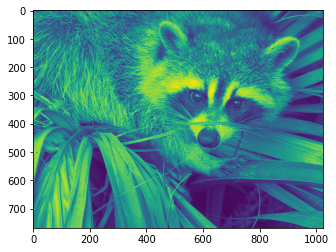

In [3]:
plt.imshow(image)

Convolution

In [4]:
laplacian = np.array([[0,1,0], [1,-4,1], [0,1,0]], dtype=np.float32)
deriv2 = signal.convolve2d(ck,laplacian,mode='same',boundary='symm')

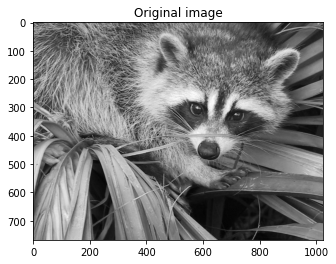

In [5]:
plt.figure()
plt.imshow(image)
plt.gray()
plt.title('Original image')
plt.show()

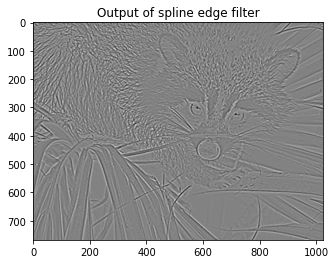

In [6]:
plt.figure()
plt.imshow(deriv)
plt.gray()
plt.title('Output of spline edge filter')
plt.show()

In [7]:
x = np.array([1.0, 2.0, 3.0])
h = np.array([0.0, 1.0, 0.0, 0.0, 0.0])
signal.convolve(x, h)
signal.convolve(x, h, 'same')

array([2., 3., 0.])

In [8]:
x = np.array([[1., 1., 0., 0.], [1., 1., 0., 0.], [0., 0., 0., 0.], [0., 0., 0., 0.]])
h = np.array([[1., 0., 0., 0.], [0., 0., 0., 0.], [0., 0., 1., 0.], [0., 0., 0., 0.]])
signal.convolve(x, h)

array([[1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [9]:
image = misc.face(gray=True)
w = np.zeros((50, 50))
w[0][0] = 1.0
w[49][25] = 1.0
image_new = signal.fftconvolve(image, w)

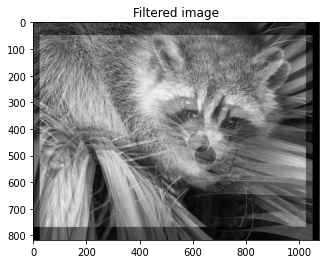

In [10]:
plt.figure()
plt.imshow(image_new)
plt.gray()
plt.title('Filtered image')
plt.show()

Spectral Analysis

In [11]:
fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
freq = 1270.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

In [12]:
f, Pwelch_spec = signal.welch(x, fs, scaling='spectrum')

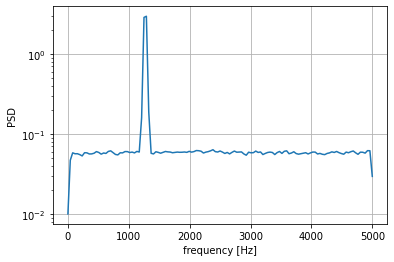

In [13]:
plt.semilogy(f, Pwelch_spec)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.grid()
plt.show()

Detrend

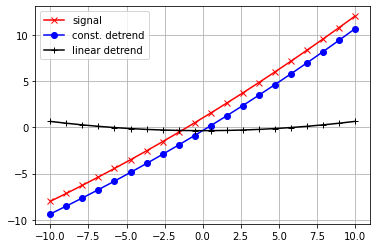

In [14]:
t = np.linspace(-10, 10, 20)
y = 1 + t + 0.01*t**2
yconst = signal.detrend(y, type='constant')
ylin = signal.detrend(y, type='linear')
plt.plot(t, y, '-rx')
plt.plot(t, yconst, '-bo')
plt.plot(t, ylin, '-k+')
plt.grid()
plt.legend(['signal', 'const. detrend', 'linear detrend'])
plt.show()

Deconvolution

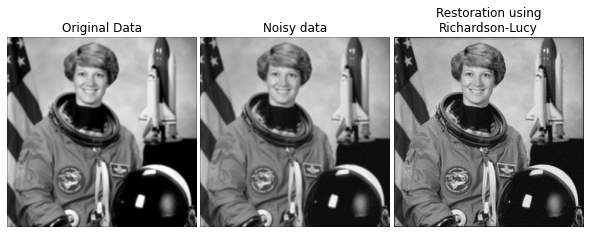

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import convolve2d as conv2

from skimage import color, data, restoration

rng = np.random.default_rng()

astro = color.rgb2gray(data.astronaut())

psf = np.ones((5, 5)) / 25
astro = conv2(astro, psf, 'same')
# Add Noise to Image
astro_noisy = astro.copy()
astro_noisy += (rng.poisson(lam=25, size=astro.shape) - 10) / 255.

# Restore Image using Richardson-Lucy algorithm
deconvolved_RL = restoration.richardson_lucy(astro_noisy, psf, 30)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(astro)
ax[0].set_title('Original Data')

ax[1].imshow(astro_noisy)
ax[1].set_title('Noisy data')

ax[2].imshow(deconvolved_RL, vmin=astro_noisy.min(), vmax=astro_noisy.max())
ax[2].set_title('Restoration using\nRichardson-Lucy')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()

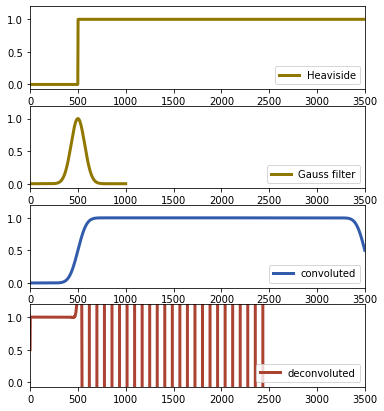

In [16]:
import scipy.signal
# Define heaviside function
H = lambda x: 0.5 * (np.sign(x) + 1.)
#define gaussian
gauss = lambda x, sig: np.exp(-( x/float(sig))**2 )

X = np.linspace(-5, 30, num=3501)
X2 = np.linspace(-5,5, num=1001)

# convolute a heaviside with a gaussian
H_c = np.convolve( H(X),  gauss(X2, 1),  mode="same"  )
# deconvolute a the result
H_dc, er = scipy.signal.deconvolve(H_c, gauss(X2, 1) )


#### Plot #### 
fig , ax = plt.subplots(nrows=4, figsize=(6,7))
ax[0].plot( H(X),          color="#907700", label="Heaviside",    lw=3 ) 
ax[1].plot( gauss(X2, 1),  color="#907700", label="Gauss filter", lw=3 )
ax[2].plot( H_c/H_c.max(), color="#325cab", label="convoluted" ,  lw=3 ) 
ax[3].plot( H_dc,          color="#ab4232", label="deconvoluted", lw=3 ) 
for i in range(len(ax)):
    ax[i].set_xlim([0, len(X)])
    ax[i].set_ylim([-0.07, 1.2])
    ax[i].legend(loc=4)
plt.show()